# Complex chebfuns

As of `v0.4.0` ChebPy supports complex variable representations. This makes it extremely convenient to perform certain computations in the complex plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from chebpy import chebfun

For example here is how we can plot a series of "Bernstein ellipses" - important objects in the convergence theory of Chebyshev series approximations for analytic functions. They are computed as transformations of the scaled complex unit circle under the Joukowsky map:

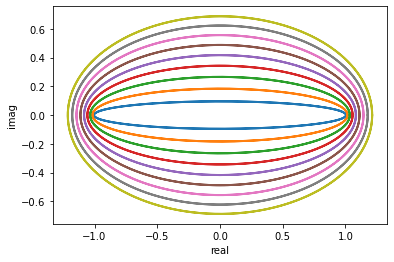

In [2]:
x = chebfun('x', [-1, 1])
z = np.exp(2*np.pi*1j*x)
def joukowsky(z): return .5*(z+1/z)
for rho in np.arange(1.1, 2, 0.1):
    ellipse = joukowsky(rho*z)
    ellipse.plot(linewidth=2)
plt.show()

Per the first line of the above code segment, each of these ellipses is a complex-valued function of the real variable `x` defined on `[-1, 1]`. It is trivial to extract the real and imaginary components and plot these on the `x` domain, which we do for the last (largest) ellipse in the sequence as follows:

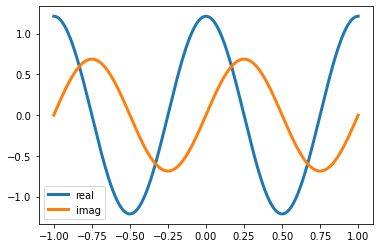

In [3]:
fig, ax = plt.subplots()
ellipse.real().plot(linewidth=3, label='real')
ellipse.imag().plot(linewidth=3, label='imag')
ax.legend()
plt.show()

Here is an example of using ChebPy to perform a contour integral calculation (replicating Trefethen & Hale's [example](https://www.chebfun.org/examples/complex/KeyholeContour.html)):

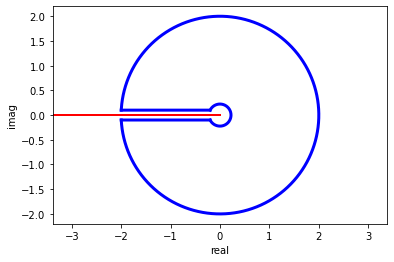

In [4]:
def keyhole(r, R, e):
    v = [-R+e*1j, -r+e*1j, -r-e*1j, -R-e*1j]
    s = chebfun('x', [0, 1])         # dummy variable
    z0 = v[0] + (v[1]-v[0])*s        # top of the keyhole
    z1 = v[1] * v[2]**s / v[1]**s    # inner circle
    z2 = v[2] + s * (v[3]-v[2])      # bottom of keyhole
    z3 = v[3] * v[0]**s / v[3]**s    # outer circle
    return z0, z1, z2, z3

# set up the keyhole contour
z0, z1, z2, z3 = keyhole(r=0.2, R=2, e=0.1)

# plot the keyhole contour
fig, ax = plt.subplots()
kwds = dict(color='b', linewidth=3)
z0.plot(ax=ax, **kwds)
z1.plot(ax=ax, **kwds)
z2.plot(ax=ax, **kwds)
z3.plot(ax=ax, **kwds)

# plot the branch cut
ax.plot([-4, 0], [0, 0], color='r', linewidth=2, linestyle='-')

ax.axis('equal')
ax.set_xlim([-2.2, 2.2])
plt.show()

We then perform the numerical integration as follows, obtaining a typically high-accuracy result.

In [5]:
def f(x): return np.log(x) * np.tanh(x)
def contour_integral(z, f):
    I = f(z) * z.diff()
    return I.sum()

y0 = np.sum([contour_integral(z, f) for z in (z0, z1, z2, z3)])    # numerical integral
y1 = 4j * np.pi * np.log(np.pi/2)                                  # exact value

print(f'   y0 = {y0:+.15f}')
print(f'   y1 = {y1:+.15f}')
print(f'y0-y1 = {y0-y1:+.15f}')

   y0 = +0.000000000000002+5.674755637702213j
   y1 = +0.000000000000000+5.674755637702224j
y0-y1 = +0.000000000000002-0.000000000000011j
